# Small dataset text classification using deep learning

## 1. Recurrent (LSTM/GRU)

In [90]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
import os
import datetime
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('results.txt',sep="\t", header=None)
df.columns=['ASTS']

df

,ASTS
0,"print|index|and|values void,PredefinedType^Met..."
1,"printing|names void,PredefinedType^MethodDecla..."
2,"colorful|write|line void,PredefinedType^Method..."
3,"printing|names void,PredefinedType^MethodDecla..."
4,"sort|three|numbers int,PredefinedType^ArrayTyp..."
5,"addition int,PredefinedType^MethodDeclaration_..."
6,"area double,PredefinedType^MethodDeclaration_P..."
7,"area double,PredefinedType^MethodDeclaration_P..."
8,"area double,PredefinedType^MethodDeclaration_P..."
9,"print|names void,PredefinedType^MethodDeclarat..."


In [96]:
tmp= df['ASTS'].str.split(' ').str[0]
dt=tmp.to_frame()

res=pd.concat([df, dt], axis=1)
res.columns=['ASTS','MethodName']
res

,ASTS,MethodName
0,"print|index|and|values void,PredefinedType^Met...",print|index|and|values
1,"printing|names void,PredefinedType^MethodDecla...",printing|names
2,"colorful|write|line void,PredefinedType^Method...",colorful|write|line
3,"printing|names void,PredefinedType^MethodDecla...",printing|names
4,"sort|three|numbers int,PredefinedType^ArrayTyp...",sort|three|numbers
5,"addition int,PredefinedType^MethodDeclaration_...",addition
6,"area double,PredefinedType^MethodDeclaration_P...",area
7,"area double,PredefinedType^MethodDeclaration_P...",area
8,"area double,PredefinedType^MethodDeclaration_P...",area
9,"print|names void,PredefinedType^MethodDeclarat...",print|names


In [125]:
training_data = res[res.columns[0]].to_numpy()
training_data = np.reshape(training_data,(-1,1))
#training_data[:2]

In [155]:
vectorizer = layers.TextVectorization(output_mode="int")
vectorizer.adapt(training_data)
integer_data = vectorizer(training_data)
print(integer_data)

tf.Tensor(
[[2019 1105 1101 ...    0    0    0]
 [ 622   25   25 ...    0    0    0]
 [3049   19  544 ...    0    0    0]
 ...
 [3048   19   19 ...    0    0    0]
 [2318 1098 1104 ...    0    0    0]
 [3297  162  162 ...    0    0    0]], shape=(22, 3239), dtype=int64)


In [156]:
labels =res[res.columns[1]]
y = np.argmax(pd.get_dummies(labels).to_numpy(), axis=1)
X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.20, random_state=42)
#startify??

In [157]:
max_features = 2000
embedding_dim = 30

inputs = tf.keras.Input(shape=(1,), dtype=tf.string, name='text')
x = vectorizer(inputs)
x = layers.Embedding(max_features + 1, embedding_dim)(x)

#x = layers.LSTM(10, dropout=0.2, recurrent_dropout=0.2)(x)
x = tf.keras.layers.GRU(10)(x)

x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.3)(x)
num_classes = 10
outputs = layers.Dense(num_classes, activation="softmax", name="predictions")(x)

model = tf.keras.Model(inputs, outputs)
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text (InputLayer)           [(None, 1)]               0         
                                                                 
 text_vectorization_8 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_9 (Embedding)     (None, None, 30)          60030     
                                                                 
 gru_5 (GRU)                 (None, 10)                1260      
                                                                 
 dense_13 (Dense)            (None, 20)                220       
                                                                 
 dropout_13 (Dropout)        (None, 20)                0         
                                                           

In [158]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
callbacks = [
    keras.callbacks.TensorBoard(logdir)
]
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=callbacks)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: nan - acc: 0.0769 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 206ms/step - loss: nan - acc: 0.0769 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 208ms/step - loss: nan - acc: 0.0769 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 208ms/step - loss: nan - acc: 0.0769 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 203ms/step - loss: nan - acc: 0.0769 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 206ms/step - loss: nan - acc: 0.0769 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 209ms/step - loss: nan - acc: 0.0769 - val_loss: nan - val_acc: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 223ms/step - loss: nan - acc: 0.0769 - val_loss: nan -

In [152]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 6148), started 9 days, 5:35:30 ago. (Use '!kill 6148' to kill it.)

In [153]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 55ms/step - loss: nan - acc: 0.0000e+00


[nan, 0.0]

In [154]:
predictions = model.predict(X_test)
print(predictions.shape)

1/1 [==============================] - 0s 380ms/step
(5, 10)


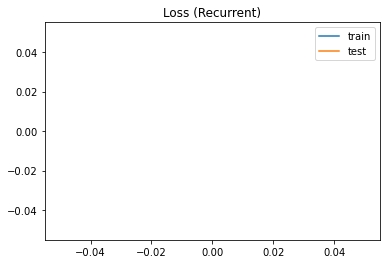

In [133]:
plt.title('Loss (Recurrent)')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 2. Transformers

In [144]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [145]:
vocab_size = 20000  # Only consider the top 20k words
maxlen = 30  # Only consider the first 200 words of each sentence

embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(10, activation="softmax")(x)

model_tr = keras.Model(inputs=inputs, outputs=outputs)

model_tr.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_tr.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 token_and_position_embeddin  (None, 30, 32)           640960    
 g_1 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_1 (Transf  (None, 30, 32)           10656     
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_1   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_10 (Dropout)        (None, 32)                0   

In [146]:
vectorizer_tr = layers.TextVectorization(output_mode="int", output_sequence_length=maxlen)
vectorizer_tr.adapt(training_data)
X_train_tr = vectorizer_tr(X_train)
X_test_tr = vectorizer_tr(X_test)
X_train_tr

<tf.Tensor: shape=(17, 30), dtype=int64, numpy=
array([[3513,  143,  141,   41, 2401, 2487,  651,  651, 2396,  142,   40,
         140, 2399, 2486,  650,  650, 2395, 2484,  649,  649, 2391, 2473,
         646,  646, 2398,   96,   13,   13,  343,   97],
       [2318, 1098, 1104, 1159,   31, 2457, 2456,   13, 2386, 2389, 2388,
        2387,    4,    6,    5,    8,    9,    7,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [ 332,   19,   19,  163,  164,  311,  313,  545,  546,  552,  551,
          25,   25,  550,   74,  554,   31,  168,  139,   37,   37,  167,
         324,   75,   75,  315,  315,  316,  316,  319],
       [ 622,   19,   19,  163,  164, 1097, 1164,   25,   74,   31,  168,
         139,   37,   37, 1554, 1551,  568,  568,   14,   14,   21,   21,
          20,   20, 2895, 2907, 2903, 2905,  145,  202],
       [1690, 2571, 2463,  645,  645, 2504, 2627,  663,   87,   87,   87,
         654,  672,  663,   87,   87,   87,  654,  672, 26

In [147]:
history_tr = model_tr.fit(X_train_tr, y_train_tr, epochs=10, batch_size=32, validation_split=0.2)

NameError: name 'y_train_tr' is not defined

In [148]:
model_tr.evaluate(X_test_tr, y_test_tr)

NameError: name 'y_test_tr' is not defined

In [131]:
predictions_tr = model_tr.predict(X_test_tr)
print(predictions_tr.shape)

(27, 10)


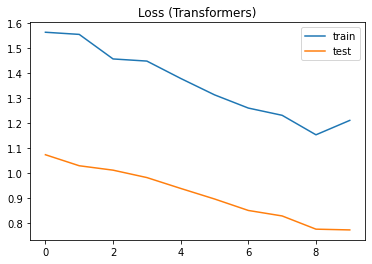

In [133]:
plt.title('Loss (Transformers)')
plt.plot(history_tr.history['loss'], label='train')
plt.plot(history_tr.history['val_loss'], label='test')
plt.legend()
plt.show()